In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

Read the dataset

In [2]:
data = pd.read_csv("city_temperature.csv")

In [3]:
data.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [4]:
data.nunique()

Region               7
Country            125
State               52
City               321
Month               12
Day                 32
Year                28
AvgTemperature    1517
dtype: int64

In [5]:
df = data.loc[data['Country'] == 'India']

In [6]:
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
312523,Asia,India,NaN,Bombay (Mumbai),1,1,1995,71.8
312524,Asia,India,NaN,Bombay (Mumbai),1,2,1995,72.0
312525,Asia,India,NaN,Bombay (Mumbai),1,3,1995,70.3
312526,Asia,India,NaN,Bombay (Mumbai),1,4,1995,69.7
312527,Asia,India,NaN,Bombay (Mumbai),1,5,1995,71.3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37063 entries, 312523 to 349585
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          37063 non-null  object 
 1   Country         37063 non-null  object 
 2   State           0 non-null      object 
 3   City            37063 non-null  object 
 4   Month           37063 non-null  int64  
 5   Day             37063 non-null  int64  
 6   Year            37063 non-null  int64  
 7   AvgTemperature  37063 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.5+ MB


Data cleaning

In [8]:
df.drop("State", axis='columns', inplace=True)

In [9]:
df.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
312523,Asia,India,Bombay (Mumbai),1,1,1995,71.8
312524,Asia,India,Bombay (Mumbai),1,2,1995,72.0
312525,Asia,India,Bombay (Mumbai),1,3,1995,70.3
312526,Asia,India,Bombay (Mumbai),1,4,1995,69.7
312527,Asia,India,Bombay (Mumbai),1,5,1995,71.3


In [10]:
df.reset_index(inplace= True)
df.head()

,index,Region,Country,City,Month,Day,Year,AvgTemperature
0,312523,Asia,India,Bombay (Mumbai),1,1,1995,71.8
1,312524,Asia,India,Bombay (Mumbai),1,2,1995,72.0
2,312525,Asia,India,Bombay (Mumbai),1,3,1995,70.3
3,312526,Asia,India,Bombay (Mumbai),1,4,1995,69.7
4,312527,Asia,India,Bombay (Mumbai),1,5,1995,71.3


In [11]:
df.drop('index', axis=1, inplace= True)

In [12]:
df.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Asia,India,Bombay (Mumbai),1,1,1995,71.8
1,Asia,India,Bombay (Mumbai),1,2,1995,72.0
2,Asia,India,Bombay (Mumbai),1,3,1995,70.3
3,Asia,India,Bombay (Mumbai),1,4,1995,69.7
4,Asia,India,Bombay (Mumbai),1,5,1995,71.3


In [13]:
df.describe()

,Month,Day,Year,AvgTemperature
count,37063.000000,37063.000000,37063.000000,37063.000000
mean,6.468958,15.717427,2007.187869,79.762461
std,3.457225,8.801267,7.324857,14.604649
min,1.000000,1.000000,1995.000000,-99.000000
25%,3.000000,8.000000,2001.000000,77.300000
50%,6.000000,16.000000,2007.000000,82.600000
75%,9.000000,23.000000,2014.000000,86.000000
max,12.000000,31.000000,2020.000000,103.700000


In [14]:
import numpy as np
df.loc[df['AvgTemperature']==-99] = np.nan


In [15]:
df.describe()

,Month,Day,Year,AvgTemperature
count,36903.000000,36903.000000,36903.000000,36903.000000
mean,6.468282,15.702978,2007.182614,80.537520
std,3.456704,8.803812,7.319416,8.663987
min,1.000000,1.000000,1995.000000,43.900000
25%,3.000000,8.000000,2001.000000,77.400000
50%,6.000000,16.000000,2007.000000,82.600000
75%,9.000000,23.000000,2014.000000,86.000000
max,12.000000,31.000000,2020.000000,103.700000


In [16]:
df.isnull().sum()

Region            160
Country           160
City              160
Month             160
Day               160
Year              160
AvgTemperature    160
dtype: int64

In [17]:
df.dropna(inplace= True)

In [18]:
df.isnull().sum()

Region            0
Country           0
City              0
Month             0
Day               0
Year              0
AvgTemperature    0
dtype: int64

In [19]:
df['City'].value_counts()

Chennai (Madras)    9237
Bombay (Mumbai)     9236
Calcutta            9225
Delhi               9205
Name: City, dtype: int64

In [20]:
df['City'] = df['City'].replace(['Chennai (Madras)', 'Bombay (Mumbai)'], ['Chennai','Bombay'])

In [21]:
df['City'].value_counts()

Chennai     9237
Bombay      9236
Calcutta    9225
Delhi       9205
Name: City, dtype: int64

In [22]:
df['AvgTempCelsius'] = (df['AvgTemperature']-32)*5/9

In [23]:
df.head()

,Region,Country,City,Month,Day,Year,AvgTemperature,AvgTempCelsius
0,Asia,India,Bombay,1.0,1.0,1995.0,71.8,22.111111
1,Asia,India,Bombay,1.0,2.0,1995.0,72.0,22.222222
2,Asia,India,Bombay,1.0,3.0,1995.0,70.3,21.277778
3,Asia,India,Bombay,1.0,4.0,1995.0,69.7,20.944444
4,Asia,India,Bombay,1.0,5.0,1995.0,71.3,21.833333


In [24]:
df.drop("AvgTemperature", axis=1, inplace= True)

Yearly Average temperature over time

<AxesSubplot:xlabel='Year', ylabel='AvgTempCelsius'>

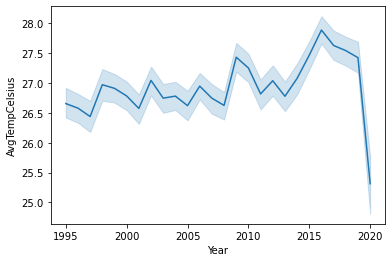

In [26]:
sns.lineplot(x= df['Year'], y= df['AvgTempCelsius'])

In [27]:
df[df['Year'] == 2020]

,Region,Country,City,Month,Day,Year,AvgTempCelsius
9132,Asia,India,Bombay,1.0,1.0,2020.0,23.333333
9133,Asia,India,Bombay,1.0,2.0,2020.0,23.944444
9134,Asia,India,Bombay,1.0,3.0,2020.0,23.277778
9135,Asia,India,Bombay,1.0,4.0,2020.0,22.555556
9136,Asia,India,Bombay,1.0,5.0,2020.0,25.611111
...,...,...,...,...,...,...,...
37058,Asia,India,Delhi,5.0,8.0,2020.0,32.166667
37059,Asia,India,Delhi,5.0,9.0,2020.0,33.500000
37060,Asia,India,Delhi,5.0,10.0,2020.0,27.722222
37061,Asia,India,Delhi,5.0,11.0,2020.0,29.277778


Monthly Average temperature of india over time

In [28]:
df.head()

,Region,Country,City,Month,Day,Year,AvgTempCelsius
0,Asia,India,Bombay,1.0,1.0,1995.0,22.111111
1,Asia,India,Bombay,1.0,2.0,1995.0,22.222222
2,Asia,India,Bombay,1.0,3.0,1995.0,21.277778
3,Asia,India,Bombay,1.0,4.0,1995.0,20.944444
4,Asia,India,Bombay,1.0,5.0,1995.0,21.833333


<AxesSubplot:xlabel='Month', ylabel='AvgTempCelsius'>

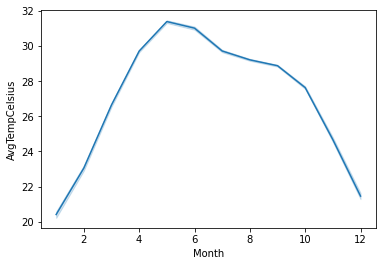

In [29]:
sns.lineplot(df['Month'], df['AvgTempCelsius'])

In [30]:
df_mean = df.groupby(['Year', 'Month'])['AvgTempCelsius'].mean()

In [31]:
df_mean

Year    Month
1995.0  1.0      19.426971
        2.0      22.383433
        3.0      25.566204
        4.0      29.590741
        5.0      31.358871
                   ...    
2020.0  1.0      20.620520
        2.0      23.128831
        3.0      26.077061
        4.0      29.356481
        5.0      30.325708
Name: AvgTempCelsius, Length: 305, dtype: float64

In [35]:
df_mean = df_mean.unstack()

<AxesSubplot:xlabel='Month', ylabel='Year'>

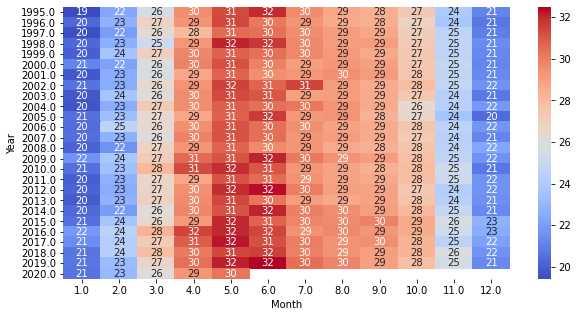

In [37]:
plt.figure(figsize=(10,5))
sns.heatmap(data= df_mean, annot=True, cmap='coolwarm')

Average temperature by city

In [40]:
df_city = df.groupby("City")['AvgTempCelsius'].mean()

In [43]:
df_city = df_city.to_frame()

In [44]:
df_city 

,AvgTempCelsius
City,
Bombay,27.843403
Calcutta,26.479085
Chennai,28.565522
Delhi,24.965683


<AxesSubplot:xlabel='City', ylabel='AvgTempCelsius'>

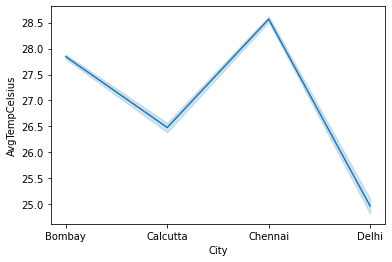

In [46]:
sns.lineplot(df['City'], df['AvgTempCelsius'])

January Temperature in the city Mumbai over time

In [47]:
df.head()

,Region,Country,City,Month,Day,Year,AvgTempCelsius
0,Asia,India,Bombay,1.0,1.0,1995.0,22.111111
1,Asia,India,Bombay,1.0,2.0,1995.0,22.222222
2,Asia,India,Bombay,1.0,3.0,1995.0,21.277778
3,Asia,India,Bombay,1.0,4.0,1995.0,20.944444
4,Asia,India,Bombay,1.0,5.0,1995.0,21.833333


In [48]:
mumbai = df.loc[df['City'] == 'Bombay']

In [49]:
mumbai

,Region,Country,City,Month,Day,Year,AvgTempCelsius
0,Asia,India,Bombay,1.0,1.0,1995.0,22.111111
1,Asia,India,Bombay,1.0,2.0,1995.0,22.222222
2,Asia,India,Bombay,1.0,3.0,1995.0,21.277778
3,Asia,India,Bombay,1.0,4.0,1995.0,20.944444
4,Asia,India,Bombay,1.0,5.0,1995.0,21.833333
...,...,...,...,...,...,...,...
9261,Asia,India,Bombay,5.0,9.0,2020.0,30.722222
9262,Asia,India,Bombay,5.0,10.0,2020.0,30.944444
9263,Asia,India,Bombay,5.0,11.0,2020.0,31.166667
9264,Asia,India,Bombay,5.0,12.0,2020.0,30.722222


In [50]:
mumbai_jan = mumbai.loc[mumbai['Month'] == 1]

In [51]:
mumbai_jan


,Region,Country,City,Month,Day,Year,AvgTempCelsius
0,Asia,India,Bombay,1.0,1.0,1995.0,22.111111
1,Asia,India,Bombay,1.0,2.0,1995.0,22.222222
2,Asia,India,Bombay,1.0,3.0,1995.0,21.277778
3,Asia,India,Bombay,1.0,4.0,1995.0,20.944444
4,Asia,India,Bombay,1.0,5.0,1995.0,21.833333
...,...,...,...,...,...,...,...
9158,Asia,India,Bombay,1.0,27.0,2020.0,25.388889
9159,Asia,India,Bombay,1.0,28.0,2020.0,24.833333
9160,Asia,India,Bombay,1.0,29.0,2020.0,22.500000
9161,Asia,India,Bombay,1.0,30.0,2020.0,23.055556


<AxesSubplot:xlabel='Year', ylabel='AvgTempCelsius'>

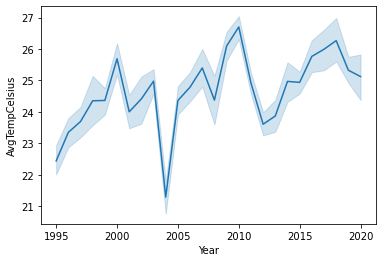

In [53]:
sns.lineplot(mumbai_jan['Year'], mumbai_jan['AvgTempCelsius'])